In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

# Generating dataset
# f=70 +0.7et-1 + 0.4et-2 +et

In [2]:
errors = np.random.normal(0, 1, 400)

In [3]:
date_index = pd.date_range(start='5/1/2019', end='1/1/2020')

In [37]:
mu = 70
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.7*errors[t-1] + 0.4*errors[t-2]  + errors[t])

In [38]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

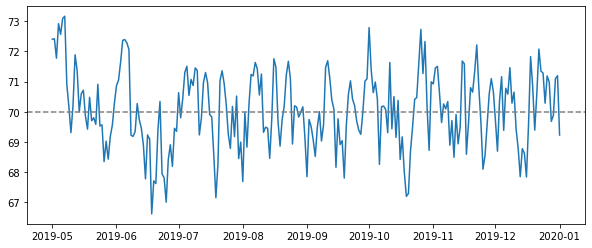

In [39]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

<BarContainer object of 10 artists>

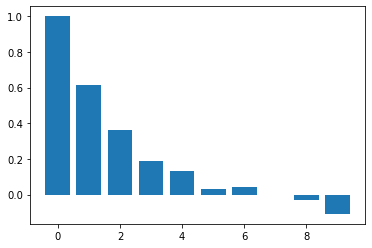

In [40]:
acf_vals=acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

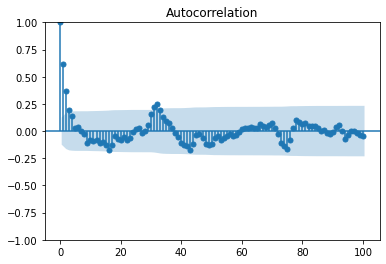

In [41]:
acf=plot_acf(series,lags=100)

pacf_vals = pacf(series)
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


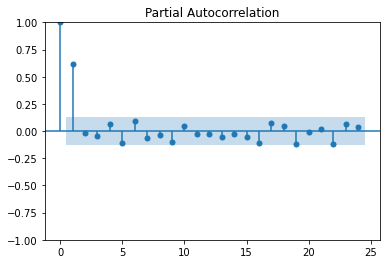

In [42]:
pacf=plot_pacf(series)

In [43]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

In [44]:
print(train_data)

2019-05-01    72.405293
2019-05-02    72.415359
2019-05-03    71.775545
2019-05-04    72.921295
2019-05-05    72.564685
                ...    
2019-12-26    71.187707
2019-12-27    70.984250
2019-12-28    69.683429
2019-12-29    69.882180
2019-12-30    71.098116
Freq: D, Length: 244, dtype: float64


In [45]:
print(test_data)

2019-12-31    71.195907
2020-01-01    69.229686
Freq: D, dtype: float64


In [47]:
model = ARIMA(train_data, order=(0,0,2))

In [48]:
#fit the model
model_fit = model.fit()

In [49]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  244
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -346.116
Date:                Mon, 04 Mar 2024   AIC                            700.231
Time:                        01:42:15   BIC                            714.220
Sample:                    05-01-2019   HQIC                           705.865
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.0757      0.126    555.461      0.000      69.828      70.323
ma.L1          0.6380      0.068      9.388      0.000       0.505       0.771
ma.L2          0.3200      0.062      5.194      0.0

In [50]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [51]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [52]:
residuals = test_data - predictions

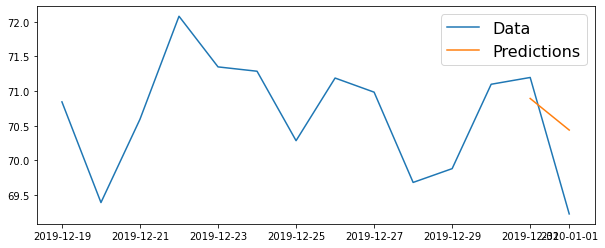

In [53]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)